<a href="https://colab.research.google.com/github/svetlanama/LendingClub/blob/main/lending_club.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load Data

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

python_material_folder_name = "python-material"

try:
    from google.colab import drive
    # Mount drive
    drive.mount('/content/drive')
    # Set up path to Python material parent folder
    path_python_material = rf"drive/MyDrive/{python_material_folder_name}"
        # If unsure, print current directory path by executing the following in a new cell:
        # !pwd
    IN_COLAB = True
except:
    IN_COLAB = False
    # If working locally on Jupyter Notebook, parent folder is one folder up (assuming you are using the folder structure shared at the beginning of the course)
    path_python_material = ".."


df = pd.read_csv(f"drive/MyDrive/AI/PUBLIC_CSV/lending-club-2007-2020Q3/Loan_status_2007-2020Q3-100ksample.csv")

df.head()

Mounted at /content/drive


,Unnamed: 0.1,Unnamed: 0,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag
0,1746494,25450,167338079,4000.0,4000.0,4000.0,36 months,13.08%,134.93,B,B5,cashier,10+ years,MORTGAGE,48000.0,Source Verified,Mar-2020,Current,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home improvement,115xx,NY,20.25,1.0,Dec-2004,665.0,669.0,0.0,19.0,110.0,4.0,1.0,1988.0,82.8%,12.0,w,3816.34,3816.34,266.950000,266.95,183.66,83.29,0.0,0.0,0.0,May-2020,134.93,Jun-2020,May-2020,669.0,665.0,1.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,3832.0,259024.0,0.0,1.0,0.0,1.0,16.0,9960.0,56.0,0.0,0.0,0.0,59.0,2400.0,1.0,0.0,0.0,1.0,64756.0,NaN,NaN,0.0,0.0,179.0,75.0,38.0,16.0,2.0,NaN,19.0,16.0,19.0,1.0,0.0,2.0,0.0,1.0,5.0,2.0,5.0,2.0,4.0,0.0,0.0,0.0,0.0,75.0,NaN,1.0,0.0,395328.0,11948.0,0.0,17928.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
1,2370717,81861,71016917,24000.0,24000.0,24000.0,60 months,9.16%,500.07,B,B2,ABM,6 years,RENT,57000.0,Source Verified,Feb-2016,Current,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Credit card refinancing,708xx,LA,25.33,0.0,Jan-2004,680.0,684.0,0.0,NaN,NaN,10.0,0.0,22697.0,64.5%,24.0,w,4333.29,4333.29,25496.160000,25496.16,19666.71,5829.45,0.0,0.0,0.0,May-2020,500.07,Jun-2020,May-2020,704.0,700.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,61815.0,0.0,3.0,0.0,3.0,14.0,39118.0,72.0,1.0,1.0,2137.0,67.0,35200.0,0.0,7.0,0.0,4.0,6182.0,7741.0,40.5,0.0,0.0,145.0,137.0,7.0,7.0,0.0,7.0,NaN,24.0,NaN,0.0,3.0,5.0,5.0,6.0,15.0,7.0,9.0,5.0,10.0,0.0,0.0,0.0,1.0,95.8,60.0,0.0,0.0,88154.0,61815.0,13000.0,52954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N
2,2264870,397109,39589826,5000.0,5000.0,5000.0,36 months,10.49%,162.49,B,B3,driver,10

# 2. Data preparation & Cleaning

## a) Handling missing values

In [2]:

# 1. Show total missing values per column
missing_per_column = df.isna().sum()
print(missing_per_column)


Unnamed: 0.1                                      0
Unnamed: 0                                        0
id                                                0
loan_amnt                                         0
funded_amnt                                       0
funded_amnt_inv                                   0
term                                              0
int_rate                                          0
installment                                       0
grade                                             0
sub_grade                                         0
emp_title                                      8954
emp_length                                     6950
home_ownership                                    0
annual_inc                                        0
verification_status                               0
issue_d                                           0
loan_status                                       0
pymnt_plan                                        0
url         

In [3]:

#  2. Show only columns with missing values
missing_columns = df.columns[df.isna().any()]
print(df[missing_columns].isna().sum())


emp_title                                      8954
emp_length                                     6950
title                                           780
dti                                             102
mths_since_last_delinq                        52814
mths_since_last_record                        85370
revol_util                                       81
last_pymnt_d                                    191
next_pymnt_d                                  63573
last_credit_pull_d                                2
collections_12_mths_ex_med                        6
mths_since_last_major_derog                   75398
annual_inc_joint                              92834
dti_joint                                     92834
verification_status_joint                     93369
tot_coll_amt                                   2438
tot_cur_bal                                    2438
open_acc_6m                                   29644
open_act_il                                   29644
open_il_12m 

In [5]:

# 3. Total number of missing values in the entire DataFrame
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")


Total missing values: 3691270


In [6]:
# 4. Show percentage of missing values per column
missing_percent = df.isna().mean() * 100
print(missing_percent[missing_percent > 0])

emp_title                                      8.954
emp_length                                     6.950
title                                          0.780
dti                                            0.102
mths_since_last_delinq                        52.814
mths_since_last_record                        85.370
revol_util                                     0.081
last_pymnt_d                                   0.191
next_pymnt_d                                  63.573
last_credit_pull_d                             0.002
collections_12_mths_ex_med                     0.006
mths_since_last_major_derog                   75.398
annual_inc_joint                              92.834
dti_joint                                     92.834
verification_status_joint                     93.369
tot_coll_amt                                   2.438
tot_cur_bal                                    2.438
open_acc_6m                                   29.644
open_act_il                                   

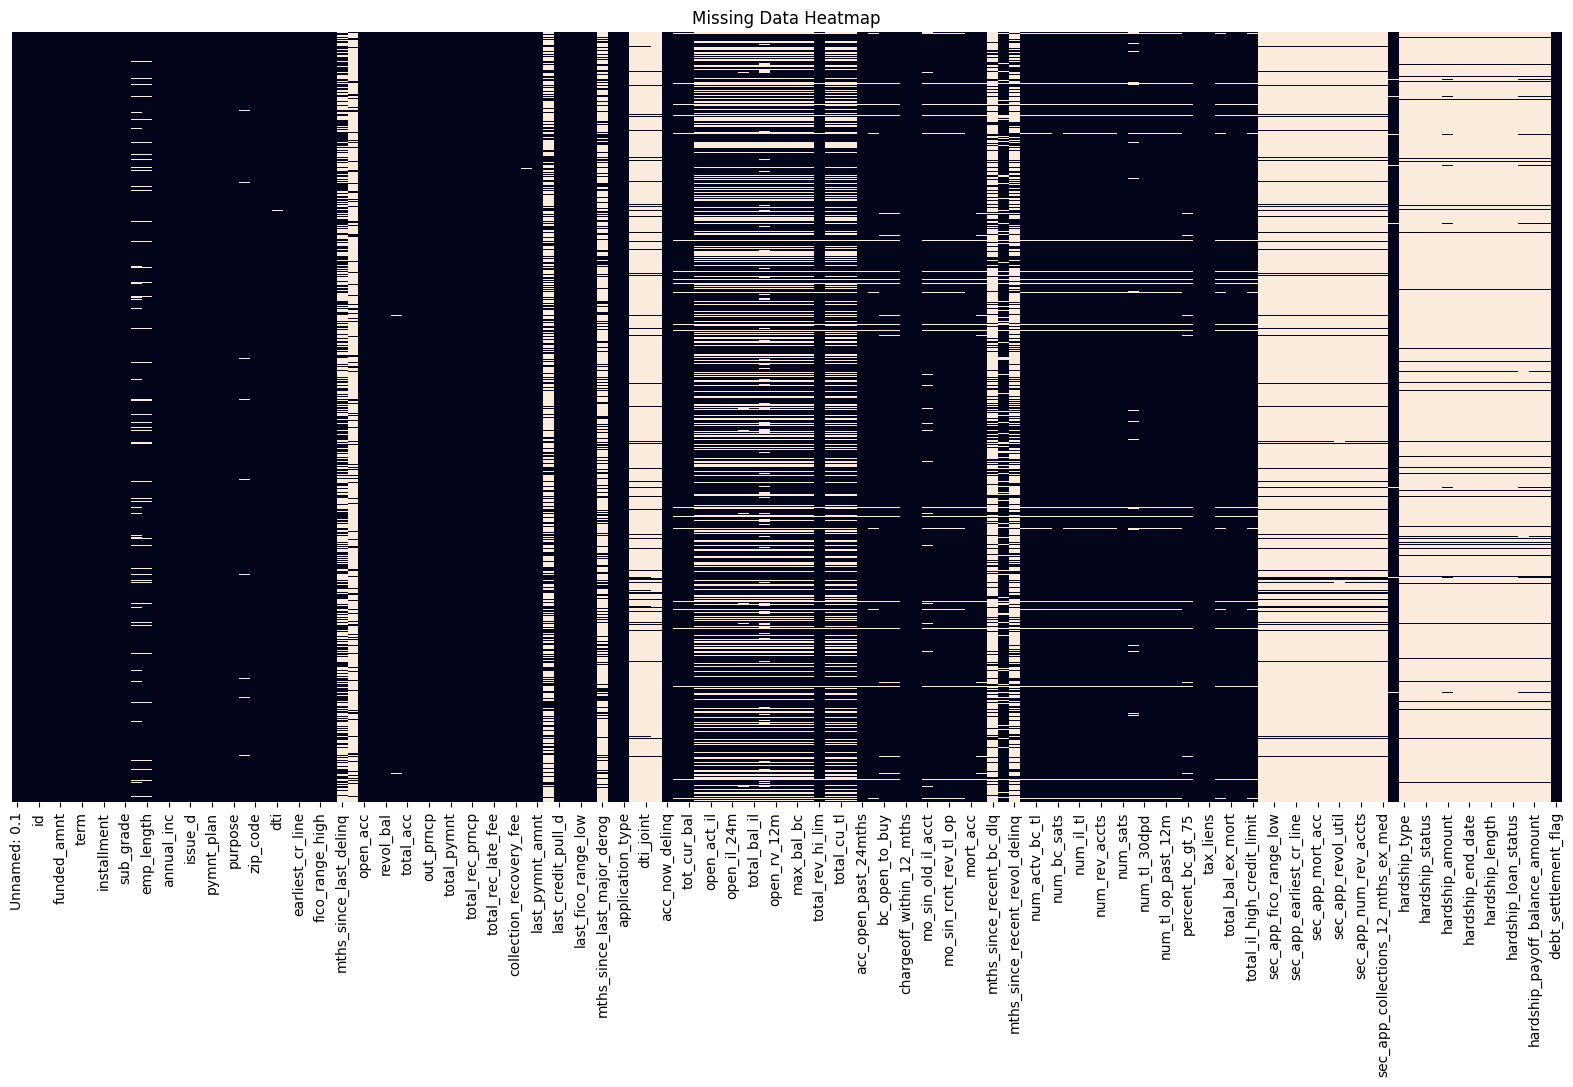

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

In [9]:
#Drop Columns with Too Many Missing Values (e.g., > 80%)
threshold = 0.8  # 80%
to_drop = df.columns[df.isna().mean() > threshold]
print(f"Columns to drop (>{int(threshold * 100)}% missing):\n{to_drop}")

df_cleaned = df.drop(columns=to_drop)

Columns to drop (>80% missing):
Index(['mths_since_last_record', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'revol_bal_joint',
       'sec_app_fico_range_low', 'sec_app_fico_range_high',
       'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
       'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util',
       'sec_app_open_act_il', 'sec_app_num_rev_accts',
       'sec_app_chargeoff_within_12_mths',
       'sec_app_collections_12_mths_ex_med', 'hardship_type',
       'hardship_reason', 'hardship_status', 'deferral_term',
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object')


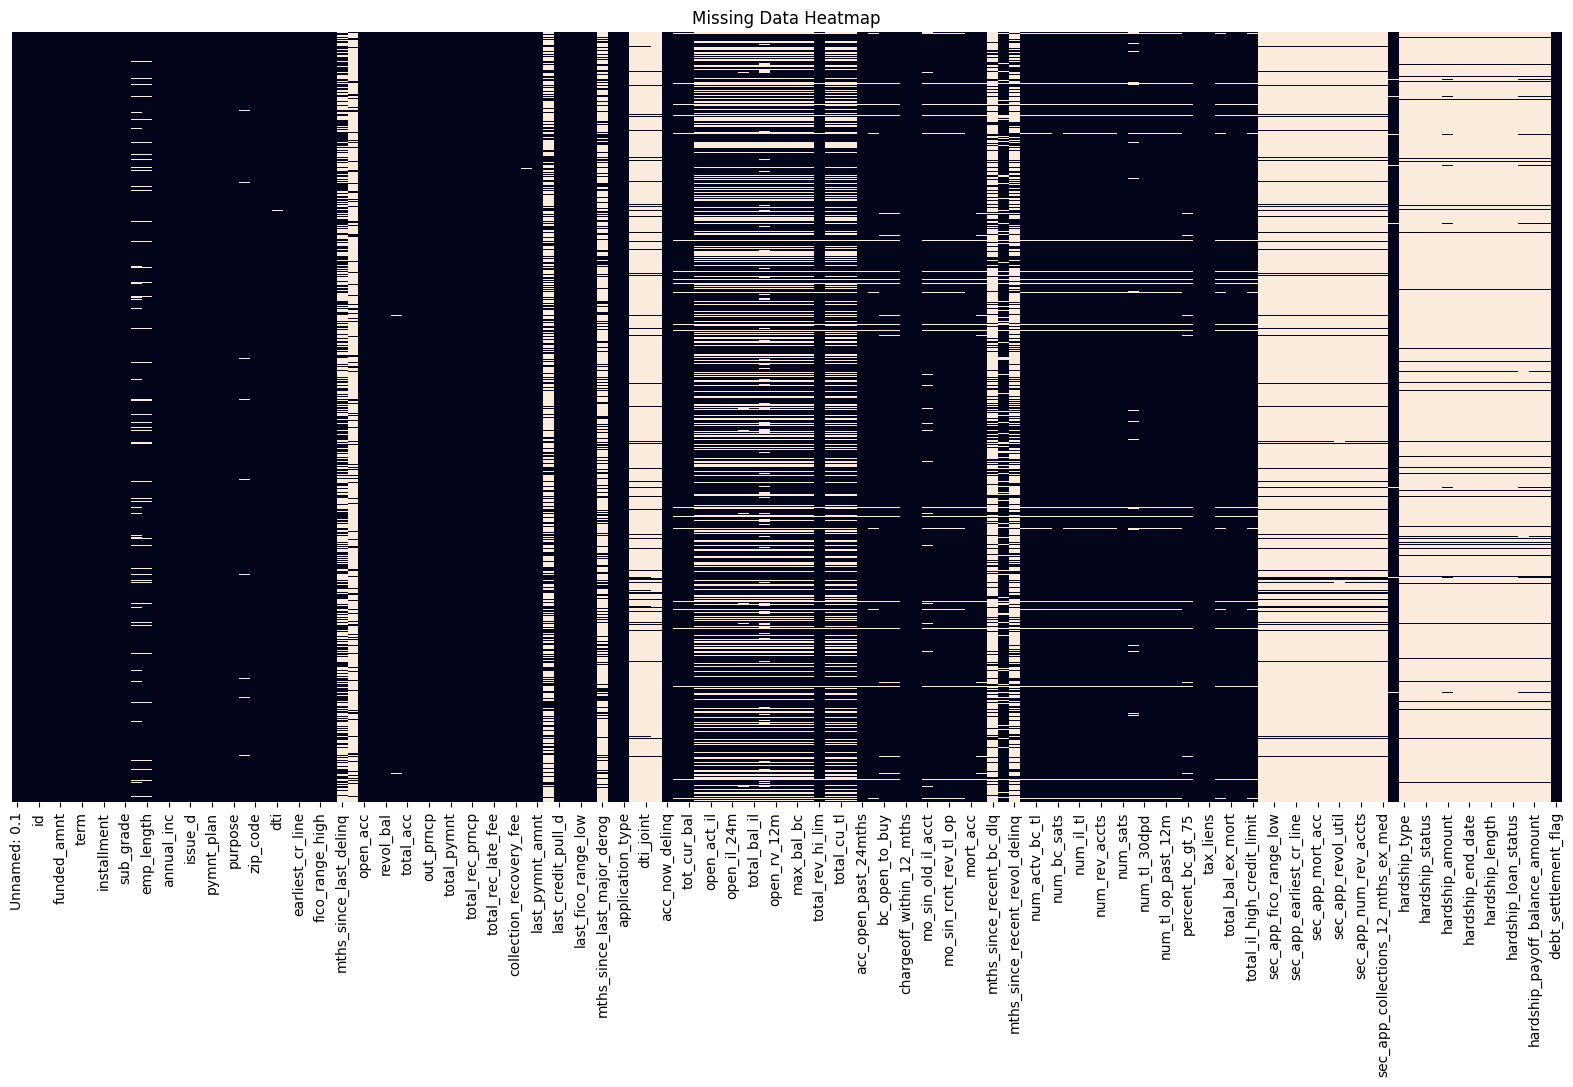

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isna(), cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Fill Missing Values

In [13]:
# Fill numeric columns with median
df.fillna(df.median(numeric_only=True), inplace=True) # df.fillna(0, inplace=True)




In [15]:
# For categorical columns, fill with mode
# for col in df.select_dtypes(include=['object']):
#     if not df[col].mode().empty:
#         df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-15-f53cb3220ec0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


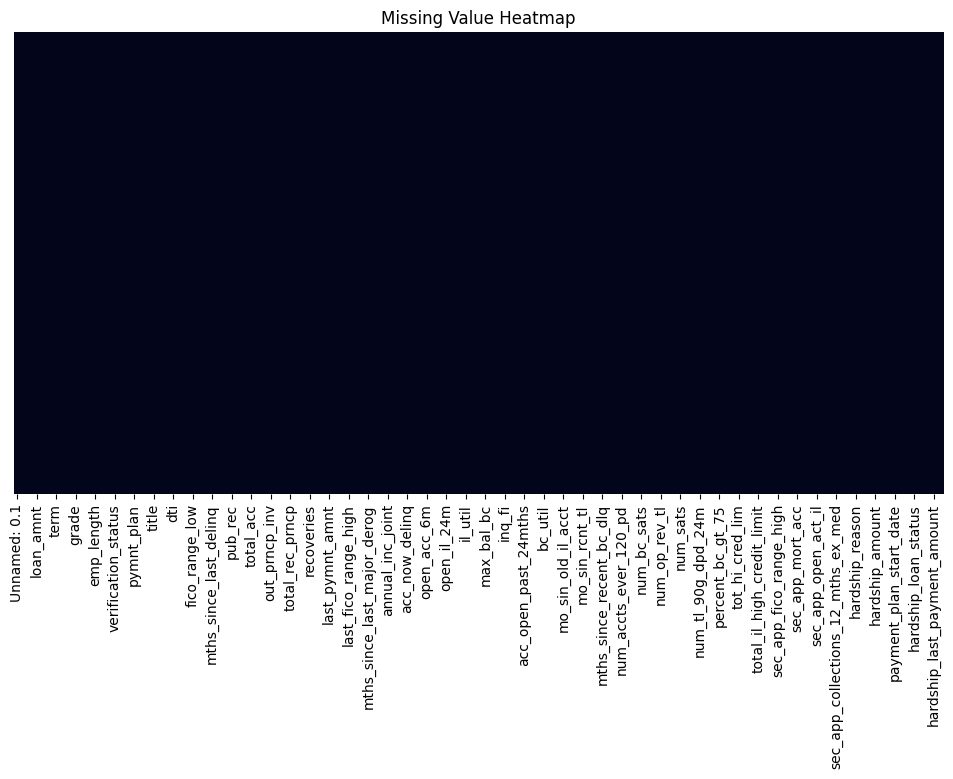

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Missing Value Heatmap')
plt.show()

In [17]:

# 3. Total number of missing values in the entire DataFrame
total_missing = df.isna().sum().sum()
print(f"Total missing values: {total_missing}")

Total missing values: 0


# Converting data types to appropriate formats





Check Current Data Types

In [19]:
print(df.dtypes)

Unnamed: 0.1                                    int64
Unnamed: 0                                      int64
id                                              int64
loan_amnt                                     float64
funded_amnt                                   float64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                  

Convert Columns to Numeric

In [18]:
columns_to_numeric = ['annual_inc_joint', 'dti_joint', 'tot_cur_bal', 'bc_util', 'revol_util']

for col in columns_to_numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# . Convert Date Columns

In [ ]:
date_columns = ['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Convert Categorical Columns to category Type

In [20]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = df[col].astype('category')

# Convert Boolean-like Columns

In [22]:
bool_columns = ['hardship_flag', 'debt_settlement_flag']

df[bool_columns] = df[bool_columns].apply(lambda col: col.map({'Y': True, 'N': False}))


In [23]:
print(df.dtypes)  # check new types
print(df.memory_usage(deep=True))  # check memory savings

Unnamed: 0.1                                     int64
Unnamed: 0                                       int64
id                                               int64
loan_amnt                                      float64
funded_amnt                                    float64
funded_amnt_inv                                float64
term                                          category
int_rate                                      category
installment                                    float64
grade                                         category
sub_grade                                     category
emp_title                                     category
emp_length                                    category
home_ownership                                category
annual_inc                                     float64
verification_status                           category
issue_d                                       category
loan_status                                   category
pymnt_plan

# Removing duplicate records